# Importação das bibliotecas

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from tensorflow import keras
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report 


tf.get_logger().setLevel('WARNING')

# Carregando os dados

In [39]:
Train_Data = pd.read_csv("../../Datasets/diabetes.csv")
Train_Data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Descrição das colunas

1. 'Pregnancies': Number of pregnancies.
2. 'Glucose': Glucose level.
3. 'BloodPressure': Blood pressure.
4. 'SkinThickness': Skin thickness.
5. 'Insulin': Insulin level.
6. 'BMI': Body mass index.
7. 'DiabetesPedigreeFunction': Diabetes pedigree function.
8. 'Age': Age of the patient.
9. 'Outcome': Binary variable indicating diabetes outcome (0: No diabetes, 1: Diabetes).

In [40]:
Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Checar se as classes estão balanceadas

In [41]:
Train_Data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# Checar se existem dados duplicados

In [42]:
print("Duplicated values: ", Train_Data.duplicated().sum())
duplicate = Train_Data[Train_Data.duplicated()]
duplicate

Duplicated values:  0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


# Checar se existem dados faltantes

In [43]:
print("Missing values: ", Train_Data.isnull().sum().sum())

Missing values:  0


# Checar se existem correlações entre os atributos e a saída

In [44]:
corr = Train_Data.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


# Rede neural

In [45]:
from sklearn.neural_network import MLPClassifier

## Dividir atributos e saída

In [46]:
X=Train_Data[Train_Data.columns[Train_Data.columns!='Outcome']]
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [47]:
Y=Train_Data['Outcome']

## Dividir treinamento e teste

In [48]:
train_x, test_x, train_y,test_y=train_test_split(X,Y,random_state=0,test_size=0.2)
print(train_y.shape, test_y.shape)

(614,) (154,)


## Rede neural multicamadas sklearn

In [49]:
def MLP(train_x, train_y, test_x, test_y, n_neurons):
    reg = MLPClassifier(hidden_layer_sizes=(n_neurons,n_neurons,n_neurons), activation="relu" ,random_state=1, max_iter=200).fit(train_x, train_y)
    y_pred=reg.predict(test_x)

    model_accuracy = round(accuracy_score(test_y, y_pred),2)
    #confusion matrix
    cm = confusion_matrix(test_y, y_pred)
    return model_accuracy,cm, y_pred

In [50]:
accuracy,conf_marix,y_pred = MLP(train_x, train_y, test_x, test_y, 512)
print("Model Accuracy:" + str(accuracy) + "\n" + "Confusion Matrix:\n" + str(conf_marix))

Model Accuracy:0.71
Confusion Matrix:
[[88 19]
 [25 22]]


In [51]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(train_x, train_y)
X_test_resampled, y_test_resampled = smote.fit_resample(test_x, test_y)


In [52]:
accuracy,conf_marix,y_pred = MLP(X_train_resampled, y_train_resampled, X_test_resampled, y_test_resampled, 512)
print("Model Accuracy:" + str(accuracy) + "\n" + "Confusion Matrix:\n" + str(conf_marix))

Model Accuracy:0.72
Confusion Matrix:
[[75 32]
 [28 79]]


In [53]:
from imblearn.combine import SMOTEENN

smoteenn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smoteenn.fit_resample(train_x, train_y)
X_test_resampled, y_test_resampled = smoteenn.fit_resample(test_x, test_y)


accuracy,conf_marix,y_pred = MLP(X_train_resampled, y_train_resampled, X_test_resampled, y_test_resampled, 512)
print("Model Accuracy:" + str(accuracy) + "\n" + "Confusion Matrix:\n" + str(conf_marix))

Model Accuracy:0.82
Confusion Matrix:
[[40 15]
 [ 9 73]]


## Rede neural multicamadas keras

In [54]:
train_x.shape

(614, 8)

In [55]:
def NN(train_x, train_y, test_x, test_y, n_neurons):
    
    tf.random.set_seed(2)
    
    new_train_x, x_val, new_train_y, y_val = train_test_split(train_x, train_y, test_size = 0.2, random_state = 13)


    NN_model = keras.Sequential([
    keras.layers.Dense(n_neurons, activation='relu', input_shape=(None, 614, 8)),
    keras.layers.Dense(n_neurons, activation='relu'),
    keras.layers.Dense(n_neurons, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
    ])
    
    NN_model.compile(
    loss='binary_crossentropy',
    optimizer='adamax',
    metrics=['accuracy']
    )
    
    
    train_history = NN_model.fit(
    new_train_x, new_train_y,
    validation_data=(x_val, y_val),
    batch_size = 8,
    shuffle=True,
    epochs = 30,
    verbose = 0
    )
    
    pred_es = NN_model.predict(test_x)
    pred_novo = [np.round(i[0]) for i in pred_es]
    results = NN_model.evaluate(test_x, test_y)
    accuracy = accuracy_score(test_y, pred_novo)
    cm = confusion_matrix(test_y, pred_novo)

    return results, accuracy, cm, train_history, pred_es

In [56]:
results, accuracy, cm, train_history, pred_es = NN(X_train_resampled, y_train_resampled, X_test_resampled, y_test_resampled, 512)
print("\nModel Accuracy:" + str(round(results[1], 2)))
print("\nModel Accuracy:" + str(round(accuracy, 2)))
print("\nConfusion Marix:\n" + str(cm))

5/5 [==============================] - 0s 4ms/step - loss: 0.5752 - accuracy: 0.8321

Model Accuracy:0.83

Model Accuracy:0.83

Confusion Marix:
[[41 14]
 [ 9 73]]


# Normalizando os dados

In [57]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.fit_transform(X_test_resampled)

# Visualizando normalização

c:\Users\talmeidar\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\talmeidar\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\talmeidar\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

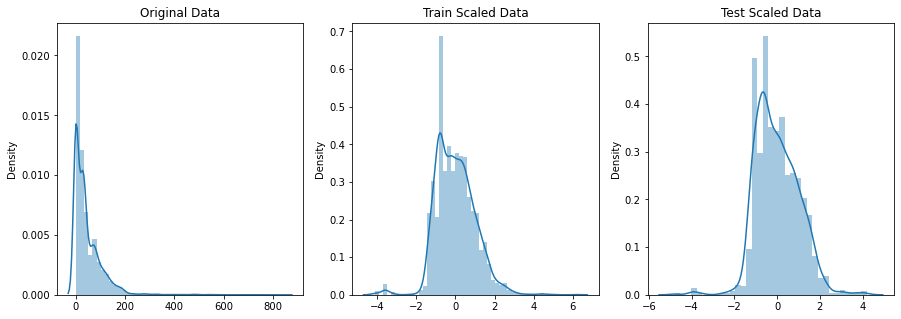

In [58]:
fig, ax = plt.subplots(ncols=3, figsize=(15,5))
sns.distplot(np.concatenate(X.values), ax=ax[0]).set_title('Original Data')
sns.distplot(np.concatenate(X_train_scaled), ax=ax[1]).set_title('Train Scaled Data')
sns.distplot(np.concatenate(X_test_scaled), ax=ax[2]).set_title('Test Scaled Data')
plt.tight_layout
plt.show()

# Redes neurais

In [59]:
train_y.shape

(614,)

In [60]:
accuracy,conf_marix,y_pred = MLP(X_train_scaled, y_train_resampled, X_test_scaled ,y_test_resampled,64)
print("Model Accuracy:" + str(accuracy) + "\n" + "Confusion Matrix:\n" + str(conf_marix))

Model Accuracy:0.84
Confusion Matrix:
[[49  6]
 [16 66]]


In [61]:
results, accuracy, cm, train_history, pred_es  = NN(X_train_scaled, y_train_resampled, X_test_scaled ,y_test_resampled,64)
print("\nModel Accuracy:" + str(round(results[1], 2)))
print("\nModel Accuracy:" + str(round(accuracy, 2)))
print("\nConfusion Marix:\n" + str(cm))

5/5 [==============================] - 0s 2ms/step - loss: 0.2706 - accuracy: 0.8905

Model Accuracy:0.89

Model Accuracy:0.89

Confusion Marix:
[[48  7]
 [ 8 74]]
